# Making the model - Based from the research paper

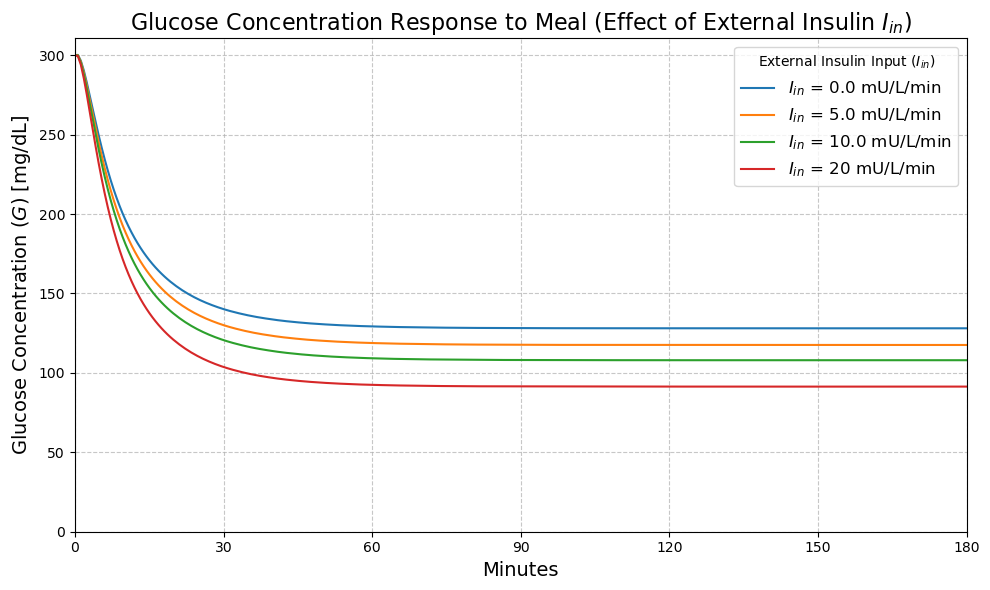

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These are the parameters for Female Subject 3
a = 0.0002       # (min^-1) - The insulin-independent utilization rate
b = 7.5919e-4    # (mL/μU/min) - The insulin-dependent utilization rate(insulin resistance)
c = 0.2298       # μU/ml/min/(mg/dl) - The insulin secretion rate
d = 1500         # μU/ml/min - The maximum insulin clearance rate
e = 2300         #   - The half-saturation value
G_in = 4.5       # (mg/dL/min) - The glucose intake rate

Iin_values = [0.0, 5.0, 10.0, 20]   #Insulin doses 

def glucose_insulin_model(t, Y, I_in):
    G = Y[0]  # Current glucose level
    I = Y[1]  # Current insulin level

    # Rate of change of glucose: intake minus utilization
    dGdt = G_in - a * G - b * G * I

    # Rate of change of insulin: external input plus secretion minus clearance
    dIdt = I_in + c * G - (d * I) / (e + I)
    
    return [dGdt, dIdt]

Y0 = [300.0, 0.0]  # Initial conditions: glucose = 300 mg/dL, insulin = 0 μU/mL

t_span = (0, 180)  # Time range for simulation: 0 to 180 minutes
t_points = np.linspace(t_span[0], t_span[1], 300)  # 300 time points to evaluate solution

plt.figure(figsize=(10, 6))  # Create figure for plotting

for I_in in Iin_values:
    # Solve the differential equations for each insulin dose
    sol = solve_ivp(
        glucose_insulin_model,  # The model function
        t_span,                 # Time span
        Y0,                     # Initial conditions
        t_eval=t_points,        # Time points to evaluate
        args=(I_in,),           # Insulin dose parameter
    )
    
    # Plot glucose concentration over time for this insulin dose
    plt.plot(sol.t, sol.y[0], label=f'$I_{{in}}$ = {I_in} mU/L/min')

plt.title('Glucose Concentration Response to Meal (Effect of External Insulin $I_{in}$)', fontsize=16)
plt.xlabel('Minutes', fontsize=14)
plt.ylabel('Glucose Concentration ($G$) [mg/dL]', fontsize=14)
plt.legend(title='External Insulin Input ($I_{in}$)', fontsize=12)
plt.xlim(t_span)  # Set x-axis limits to exactly match time span
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
plt.xticks(np.arange(t_span[0], t_span[1] + 1, 30))  # Ticks from 0 to 180 in steps of 30
plt.yticks(np.arange(0, 301, 50))  # Set y-axis ticks every 50 mg/dL
plt.tight_layout()  # Adjust layout to prevent label clipping
# Save the plot in multiple formats for research purposes
#plt.savefig('glucose_insulin_response.png', dpi=600, bbox_inches='tight', facecolor='white', edgecolor='none')  # For PNG format
plt.show()

# Validating the model

---- Validating our code with research----
Our Code vs Research Paper:
Iin | Our Result | Research | Difference
----|------------|----------|-----------
0.0 |    128.054 |  128.052 |      0.002
5.0 |    117.554 |  117.526 |      0.028
10.0 |    107.956 |  107.912 |      0.044
 20 |     91.351 |   91.291 |      0.060


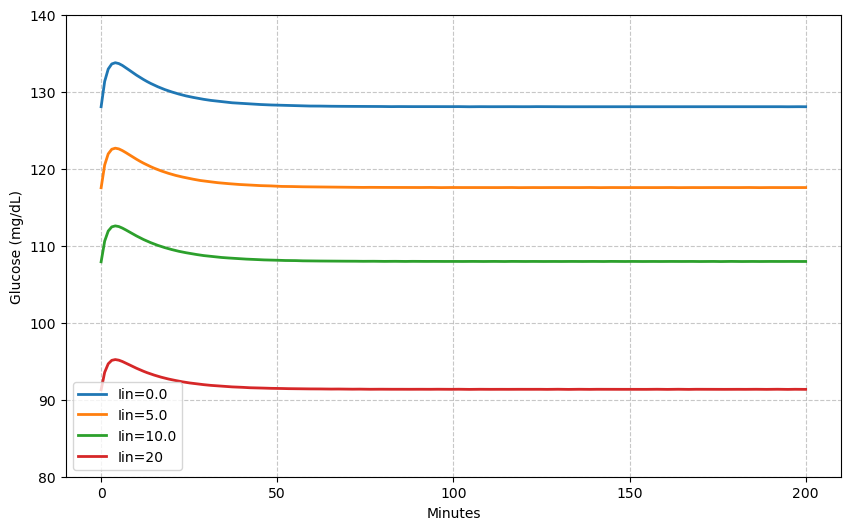

In [21]:
# These are the parameters for Female Subject 3
a = 0.0002       # (min^-1) - The insulin-independent utilization rate
b = 7.5919e-4    # (mL/μU/min) - The insulin-dependent utilization rate(insulin resistance)
c = 0.2298       # μU/ml/min/(mg/dl) - The insulin secretion rate
d = 1500         # μU/ml/min - The maximum insulin clearance rate
e = 2300         #   - The half-saturation value
G_in = 4.5       # (mg/dL/min) - The glucose intake rate

Iin_values = [0.0, 5.0, 10.0, 20]   #Insulin doses 

# Research paper results
research_results = {
    0: 128.052,
    5: 117.526, 
    10: 107.912,
    20: 91.2907
}

print("---- Validating our code with research----")
print("Our Code vs Research Paper:")
print("Iin | Our Result | Research | Difference")
print("----|------------|----------|-----------")

for I_in in Iin_values:
    # Run simulation to steady state
    sol = solve_ivp(glucose_insulin_model, [0, 1000], [150, 10], 
                   args=(I_in,), t_eval=np.linspace(0, 1000, 1000))
    
    our_result = np.mean(sol.y[0][-100:])  # Average of last 100 points
    research_value = research_results[I_in]
    difference = abs(our_result - research_value)
    
    print(f"{I_in:3} | {our_result:10.3f} | {research_value:8.3f} | {difference:10.3f}")
    

# Create the graph
plt.figure(figsize=(10, 6))

for I_in in Iin_values:
    sol = solve_ivp(glucose_insulin_model, [0, 200], [research_results[I_in], I_in], 
                   args=(I_in,), t_eval=np.linspace(0, 200, 200))
    plt.plot(sol.t, sol.y[0], label=f'Iin={I_in}', linewidth=2)

plt.xlabel('Minutes')
plt.ylabel('Glucose (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 201, 50))
plt.yticks(np.arange(80, 141, 10))
plt.ylim(80, 140)
plt.show()

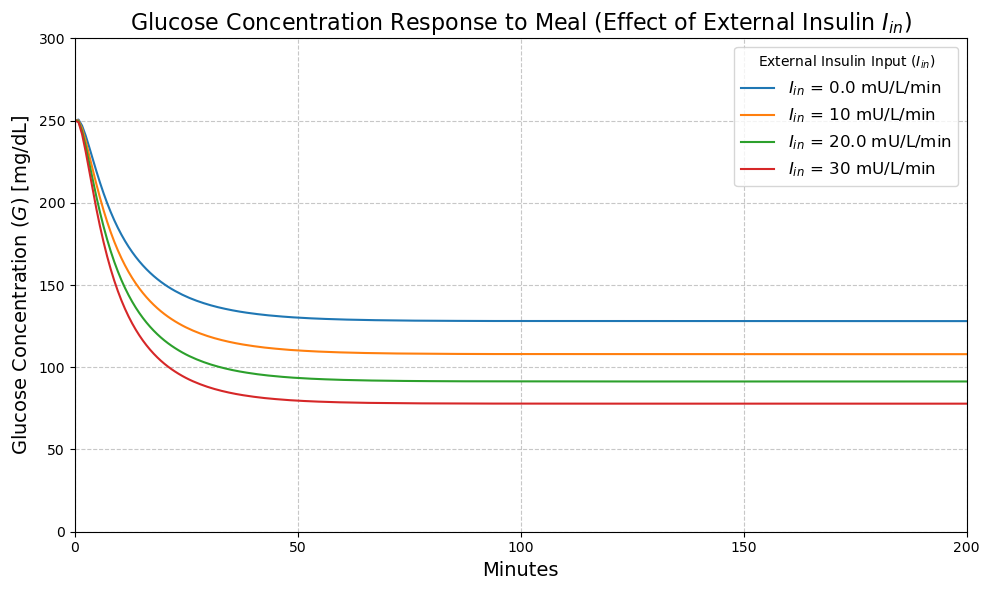

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These are the parameters for Female Subject 3
a = 0.0002       # (min^-1) - The insulin-independent utilization rate
b = 7.5919e-4    # (mL/μU/min) - The insulin-dependent utilization rate(insulin resistance)
c = 0.2298       # μU/ml/min/(mg/dl) - The insulin secretion rate
d = 1500         # μU/ml/min - The maximum insulin clearance rate
e = 2300         #   - The half-saturation value
G_in = 4.5       # (mg/dL/min) - The glucose intake rate

Iin_values = [0.0, 10, 20.0, 30]   #Insulin doses 


def glucose_insulin_model(t, Y, I_in):
    G = Y[0]  # Current glucose level
    I = Y[1]  # Current insulin level

    # Rate of change of glucose: intake minus utilization
    dGdt = G_in - a * G - b * G * I

    # Rate of change of insulin: external input plus secretion minus clearance
    dIdt = I_in + c * G - (d * I) / (e + I)
    
    return [dGdt, dIdt]


Y0 = [250.0, 0.0]  # Initial conditions

t_span = (0, 240)  # Time range for simulation: 0 to 240 minutes
t_points = np.linspace(t_span[0], t_span[1], 300)  # 300 time points to evaluate solution


plt.figure(figsize=(10, 6))  # Create figure for plotting

for I_in in Iin_values:
    # Solve the differential equations for each insulin dose
    sol = solve_ivp(
        glucose_insulin_model,  # The model function
        t_span,                 # Time span
        Y0,                     # Initial conditions
        t_eval=t_points,        # Time points to evaluate
        args=(I_in,),           # Insulin dose parameter
    )
    
    # Plot glucose concentration over time for this insulin dose
    plt.plot(sol.t, sol.y[0], label=f'$I_{{in}}$ = {I_in} mU/L/min')

plt.title('Glucose Concentration Response to Meal (Effect of External Insulin $I_{in}$)', fontsize=16)
plt.xlabel('Minutes', fontsize=14)
plt.ylabel('Glucose Concentration ($G$) [mg/dL]', fontsize=14)
plt.legend(title='External Insulin Input ($I_{in}$)', fontsize=12)
plt.xlim(0, 200)  # Set x-axis limits to 0-200 minutes
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
plt.xticks(np.arange(0, 201, 50))  # Set x-axis ticks every 50 minutes
plt.yticks(np.arange(0, 301, 50))  # Set y-axis ticks every 50 mg/dL
plt.tight_layout()  # Adjust layout to prevent label clipping

# Parametrice each function (which matters the most)

## Normal model (Normal error)
When we implemented the model. Their is a 0.0335 mean error from reality. Which we need to take into acconut when finding which parameters that affects the most. 

These values were given from the research, and we are just using their values. To see if our model is correct. 

---- Validating our code with research----
Our Code vs Research Paper:
Iin | Our Result | Research | Difference
----|------------|----------|-----------
0.0 |    128.054 |  128.052 |      0.002
5.0 |    117.554 |  117.526 |      0.028
10.0 |    107.956 |  107.912 |      0.044
 20 |     91.351 |   91.291 |      0.060


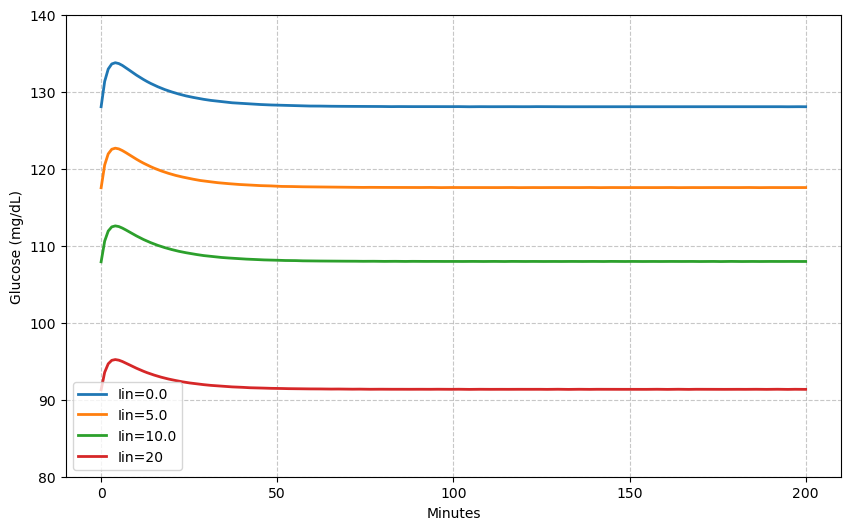

In [4]:
# These are the parameters for Female Subject 3
a = 0.0002       # (min^-1) - The insulin-independent utilization rate
b = 7.5919e-4    # (mL/μU/min) - The insulin-dependent utilization rate(insulin resistance)
c = 0.2298       # μU/ml/min/(mg/dl) - The insulin secretion rate
d = 1500         # μU/ml/min - The maximum insulin clearance rate
e = 2300         #   - The half-saturation value
G_in = 4.5       # (mg/dL/min) - The glucose intake rate

Iin_values = [0.0, 5.0, 10.0, 20]   #Insulin doses 

#Research paper results
research_results = {
    0: 128.052,
    5: 117.526, 
    10: 107.912,
    20: 91.2907
}

print("---- Validating our code with research----")
print("Our Code vs Research Paper:")
print("Iin | Our Result | Research | Difference")
print("----|------------|----------|-----------")

for I_in in Iin_values:
    # Run simulation to steady state
    sol = solve_ivp(glucose_insulin_model, [0, 1000], [150, 10], 
                   args=(I_in,), t_eval=np.linspace(0, 1000, 1000))
    
    our_result = np.mean(sol.y[0][-100:])  # Average of last 100 points
    research_value = research_results[I_in]
    difference = abs(our_result - research_value)
    
    print(f"{I_in:3} | {our_result:10.3f} | {research_value:8.3f} | {difference:10.3f}")
    

# Create the graph
plt.figure(figsize=(10, 6))

for I_in in Iin_values:
    sol = solve_ivp(glucose_insulin_model, [0, 200], [research_results[I_in], I_in], 
                   args=(I_in,), t_eval=np.linspace(0, 200, 200))
    plt.plot(sol.t, sol.y[0], label=f'Iin={I_in}', linewidth=2)

plt.xlabel('Minutes')
plt.ylabel('Glucose (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 201, 50))
plt.yticks(np.arange(80, 141, 10))
plt.ylim(80, 140)
plt.show()

## A (10%) increase
Their is a 0.0225 mean error from reality 

---- Validating our code with research----
Our Code vs Research Paper:
Iin | Our Result | Research | Difference
----|------------|----------|-----------
0.0 |    128.018 |  128.052 |      0.034
5.0 |    117.521 |  117.526 |      0.005
10.0 |    107.926 |  107.912 |      0.014
 20 |     91.327 |   91.291 |      0.036


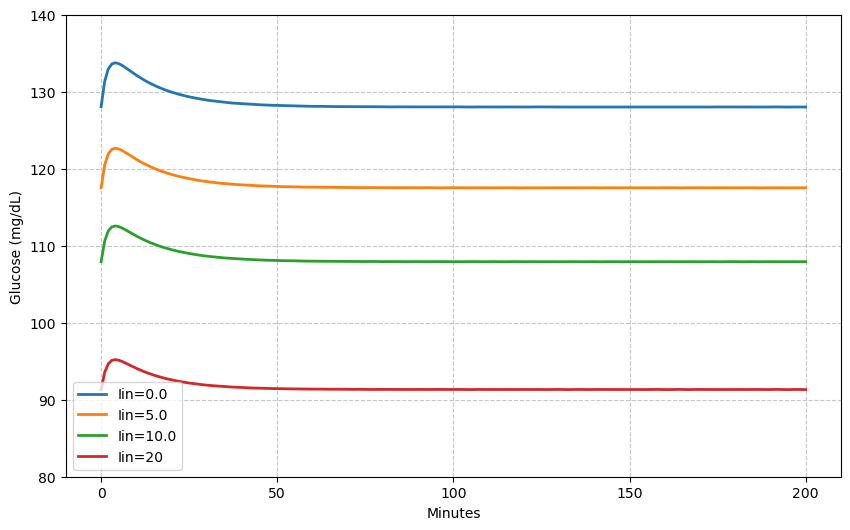

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These are the parameters for Female Subject 3
a = 0.00022       # (min^-1) - The insulin-independent utilization rate
b = 7.5919e-4    # (mL/μU/min) - The insulin-dependent utilization rate(insulin resistance)
c = 0.2298       # μU/ml/min/(mg/dl) - The insulin secretion rate
d = 1500         # μU/ml/min - The maximum insulin clearance rate
e = 2300         #   - The half-saturation value
G_in = 4.5       # (mg/dL/min) - The glucose intake rate

Iin_values = [0.0, 5.0, 10.0, 20]   #Insulin doses 

# Research paper results
research_results = {
    0: 128.052,
    5: 117.526, 
    10: 107.912,
    20: 91.2907
}

print("---- Validating our code with research----")
print("Our Code vs Research Paper:")
print("Iin | Our Result | Research | Difference")
print("----|------------|----------|-----------")

for I_in in Iin_values:
    # Run simulation to steady state
    sol = solve_ivp(glucose_insulin_model, [0, 1000], [150, 10], 
                   args=(I_in,), t_eval=np.linspace(0, 1000, 1000))
    
    our_result = np.mean(sol.y[0][-100:])  # Average of last 100 points
    research_value = research_results[I_in]
    difference = abs(our_result - research_value)
    
    print(f"{I_in:3} | {our_result:10.3f} | {research_value:8.3f} | {difference:10.3f}")
    

# Create the graph
plt.figure(figsize=(10, 6))

for I_in in Iin_values:
    sol = solve_ivp(glucose_insulin_model, [0, 200], [research_results[I_in], I_in], 
                   args=(I_in,), t_eval=np.linspace(0, 200, 200))
    plt.plot(sol.t, sol.y[0], label=f'Iin={I_in}', linewidth=2)

plt.xlabel('Minutes')
plt.ylabel('Glucose (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 201, 50))
plt.yticks(np.arange(80, 141, 10))
plt.ylim(80, 140)
plt.show()

## B (10%) increase
The mean error from the results 6.0825

---- Validating our code with research----
Our Code vs Research Paper:
Iin | Our Result | Research | Difference
----|------------|----------|-----------
0.0 |    121.815 |  128.052 |      6.237
5.0 |    111.342 |  117.526 |      6.184
10.0 |    101.818 |  107.912 |      6.094
 20 |     85.476 |   91.291 |      5.815


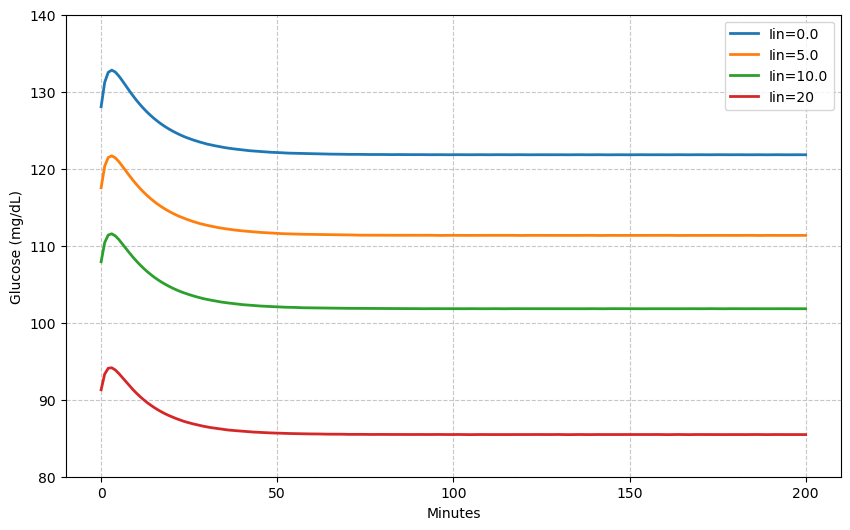

In [6]:
# These are the parameters for Female Subject 3
a = 0.0002       # (min^-1) - The insulin-independent utilization rate
b = 8.4e-4    # (mL/μU/min) - The insulin-dependent utilization rate(insulin resistance)
c = 0.2298       # μU/ml/min/(mg/dl) - The insulin secretion rate
d = 1500         # μU/ml/min - The maximum insulin clearance rate
e = 2300         #   - The half-saturation value
G_in = 4.5       # (mg/dL/min) - The glucose intake rate
Iin_values = [0.0, 5.0, 10.0, 20]   #Insulin doses 


#Research paper results
research_results = {
    0: 128.052,
    5: 117.526, 
    10: 107.912,
    20: 91.2907
}

print("---- Validating our code with research----")
print("Our Code vs Research Paper:")
print("Iin | Our Result | Research | Difference")
print("----|------------|----------|-----------")

for I_in in Iin_values:
    # Run simulation to steady state
    sol = solve_ivp(glucose_insulin_model, [0, 1000], [150, 10], 
                   args=(I_in,), t_eval=np.linspace(0, 1000, 1000))
    
    our_result = np.mean(sol.y[0][-100:])  # Average of last 100 points
    research_value = research_results[I_in]
    difference = abs(our_result - research_value)
    
    print(f"{I_in:3} | {our_result:10.3f} | {research_value:8.3f} | {difference:10.3f}")
    

# Create the graph
plt.figure(figsize=(10, 6))

for I_in in Iin_values:
    sol = solve_ivp(glucose_insulin_model, [0, 200], [research_results[I_in], I_in], 
                   args=(I_in,), t_eval=np.linspace(0, 200, 200))
    plt.plot(sol.t, sol.y[0], label=f'Iin={I_in}', linewidth=2)

plt.xlabel('Minutes')
plt.ylabel('Glucose (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 201, 50))
plt.yticks(np.arange(80, 141, 10))
plt.ylim(80, 140)
plt.show()

## C (10% increase)

The mean error was 4.545

---- Validating our code with research----
Our Code vs Research Paper:
Iin | Our Result | Research | Difference
----|------------|----------|-----------
0.0 |    122.052 |  128.052 |      6.000
5.0 |    112.481 |  117.526 |      5.045
10.0 |    103.693 |  107.912 |      4.219
 20 |     88.375 |   91.291 |      2.916


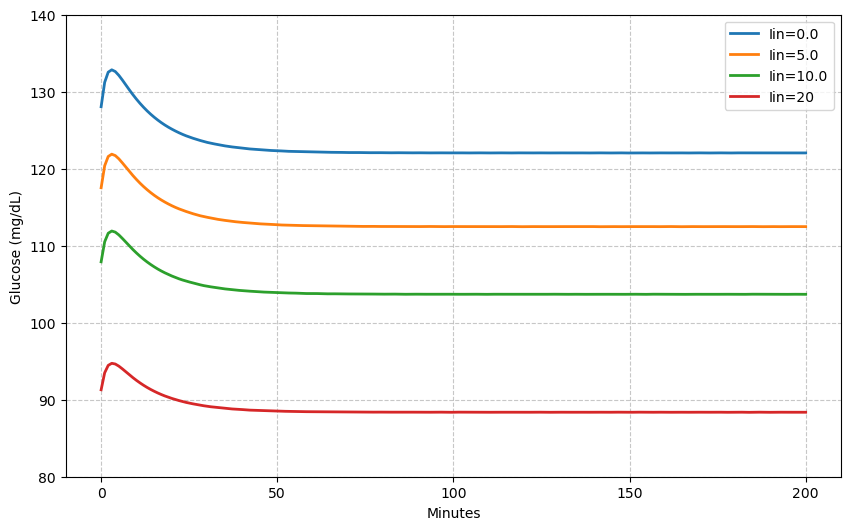

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These are the parameters for Female Subject 3
a = 0.0002       # (min^-1) - The insulin-independent utilization rate
b = 7.5919e-4    # (mL/μU/min) - The insulin-dependent utilization rate(insulin resistance)
c = 0.25278       # μU/ml/min/(mg/dl) - The insulin secretion rate
d = 1500         # μU/ml/min - The maximum insulin clearance rate
e = 2300         #   - The half-saturation value
G_in = 4.5       # (mg/dL/min) - The glucose intake rate

Iin_values = [0.0, 5.0, 10.0, 20]   #Insulin doses 

# Research paper results
research_results = {
    0: 128.052,
    5: 117.526, 
    10: 107.912,
    20: 91.2907
}

print("---- Validating our code with research----")
print("Our Code vs Research Paper:")
print("Iin | Our Result | Research | Difference")
print("----|------------|----------|-----------")

for I_in in Iin_values:
    # Run simulation to steady state
    sol = solve_ivp(glucose_insulin_model, [0, 1000], [150, 10], 
                   args=(I_in,), t_eval=np.linspace(0, 1000, 1000))
    
    our_result = np.mean(sol.y[0][-100:])  # Average of last 100 points
    research_value = research_results[I_in]
    difference = abs(our_result - research_value)
    
    print(f"{I_in:3} | {our_result:10.3f} | {research_value:8.3f} | {difference:10.3f}")
    

# Create the graph
plt.figure(figsize=(10, 6))

for I_in in Iin_values:
    sol = solve_ivp(glucose_insulin_model, [0, 200], [research_results[I_in], I_in], 
                   args=(I_in,), t_eval=np.linspace(0, 200, 200))
    plt.plot(sol.t, sol.y[0], label=f'Iin={I_in}', linewidth=2)

plt.xlabel('Minutes')
plt.ylabel('Glucose (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 201, 50))
plt.yticks(np.arange(80, 141, 10))
plt.ylim(80, 140)
plt.show()

## D (10% increase)
The mean error is 6.233 

---- Validating our code with research----
Our Code vs Research Paper:
Iin | Our Result | Research | Difference
----|------------|----------|-----------
0.0 |    134.347 |  128.052 |      6.295
5.0 |    123.833 |  117.526 |      6.307
10.0 |    114.179 |  107.912 |      6.267
 20 |     97.354 |   91.291 |      6.063


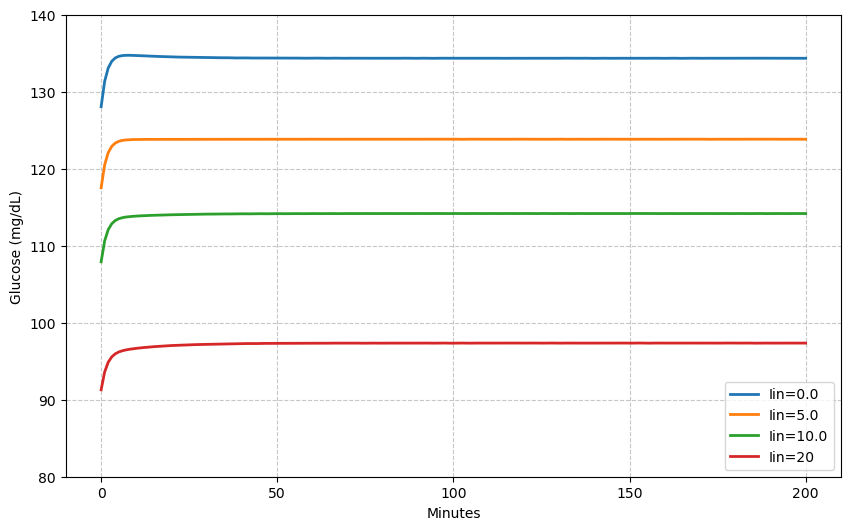

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These are the parameters for Female Subject 3
a = 0.0002       # (min^-1) - The insulin-independent utilization rate
b = 7.5919e-4    # (mL/μU/min) - The insulin-dependent utilization rate(insulin resistance)
c = 0.2298       # μU/ml/min/(mg/dl) - The insulin secretion rate
d = 1650         # μU/ml/min - The maximum insulin clearance rate
e = 2300         #   - The half-saturation value
G_in = 4.5       # (mg/dL/min) - The glucose intake rate

Iin_values = [0.0, 5.0, 10.0, 20]   #Insulin doses 

# Research paper results
research_results = {
    0: 128.052,
    5: 117.526, 
    10: 107.912,
    20: 91.2907
}

print("---- Validating our code with research----")
print("Our Code vs Research Paper:")
print("Iin | Our Result | Research | Difference")
print("----|------------|----------|-----------")

for I_in in Iin_values:
    # Run simulation to steady state
    sol = solve_ivp(glucose_insulin_model, [0, 1000], [150, 10], 
                   args=(I_in,), t_eval=np.linspace(0, 1000, 1000))
    
    our_result = np.mean(sol.y[0][-100:])  # Average of last 100 points
    research_value = research_results[I_in]
    difference = abs(our_result - research_value)
    
    print(f"{I_in:3} | {our_result:10.3f} | {research_value:8.3f} | {difference:10.3f}")
    

# Create the graph
plt.figure(figsize=(10, 6))

for I_in in Iin_values:
    sol = solve_ivp(glucose_insulin_model, [0, 200], [research_results[I_in], I_in], 
                   args=(I_in,), t_eval=np.linspace(0, 200, 200))
    plt.plot(sol.t, sol.y[0], label=f'Iin={I_in}', linewidth=2)

plt.xlabel('Minutes')
plt.ylabel('Glucose (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 201, 50))
plt.yticks(np.arange(80, 141, 10))
plt.ylim(80, 140)
plt.show()

## E (10% increase)
The mean error is 5.73775

---- Validating our code with research----
Our Code vs Research Paper:
Iin | Our Result | Research | Difference
----|------------|----------|-----------
0.0 |    122.167 |  128.052 |      5.885
5.0 |    111.692 |  117.526 |      5.834
10.0 |    102.164 |  107.912 |      5.748
 20 |     85.806 |   91.291 |      5.484


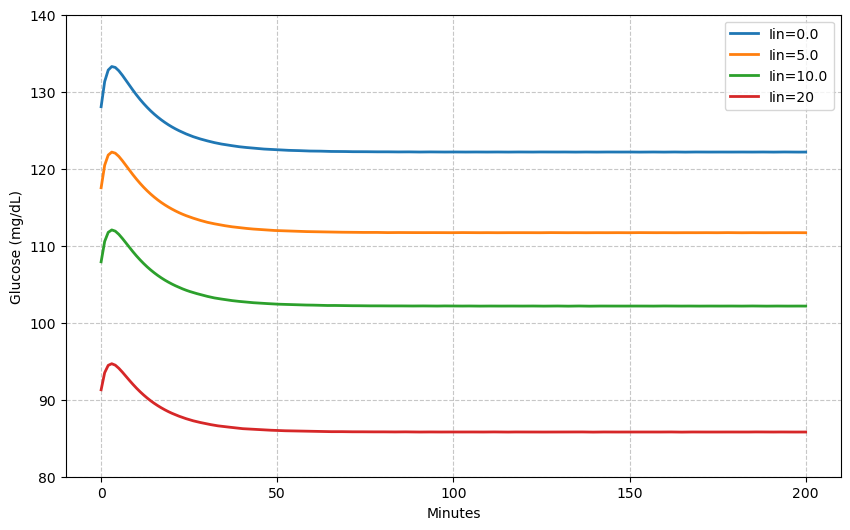

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These are the parameters for Female Subject 3
a = 0.0002       # (min^-1) - The insulin-independent utilization rate
b = 7.5919e-4    # (mL/μU/min) - The insulin-dependent utilization rate(insulin resistance)
c = 0.2298       # μU/ml/min/(mg/dl) - The insulin secretion rate
d = 1500         # μU/ml/min - The maximum insulin clearance rate
e = 2530         #   - The half-saturation value
G_in = 4.5       # (mg/dL/min) - The glucose intake rate

Iin_values = [0.0, 5.0, 10.0, 20]   #Insulin doses 

# Research paper results
research_results = {
    0: 128.052,
    5: 117.526, 
    10: 107.912,
    20: 91.2907
}

print("---- Validating our code with research----")
print("Our Code vs Research Paper:")
print("Iin | Our Result | Research | Difference")
print("----|------------|----------|-----------")

for I_in in Iin_values:
    # Run simulation to steady state
    sol = solve_ivp(glucose_insulin_model, [0, 1000], [150, 10], 
                   args=(I_in,), t_eval=np.linspace(0, 1000, 1000))
    
    our_result = np.mean(sol.y[0][-100:])  # Average of last 100 points
    research_value = research_results[I_in]
    difference = abs(our_result - research_value)
    
    print(f"{I_in:3} | {our_result:10.3f} | {research_value:8.3f} | {difference:10.3f}")
    

# Create the graph
plt.figure(figsize=(10, 6))

for I_in in Iin_values:
    sol = solve_ivp(glucose_insulin_model, [0, 200], [research_results[I_in], I_in], 
                   args=(I_in,), t_eval=np.linspace(0, 200, 200))
    plt.plot(sol.t, sol.y[0], label=f'Iin={I_in}', linewidth=2)

plt.xlabel('Minutes')
plt.ylabel('Glucose (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 201, 50))
plt.yticks(np.arange(80, 141, 10))
plt.ylim(80, 140)
plt.show()

## Curiosity : What about Gin? 
The mean error is 6.12 

---- Validating our code with research----
Our Code vs Research Paper:
Iin | Our Result | Research | Difference
----|------------|----------|-----------
0.0 |    134.257 |  128.052 |      6.205
5.0 |    123.729 |  117.526 |      6.203
10.0 |    114.063 |  107.912 |      6.151
 20 |     97.212 |   91.291 |      5.921


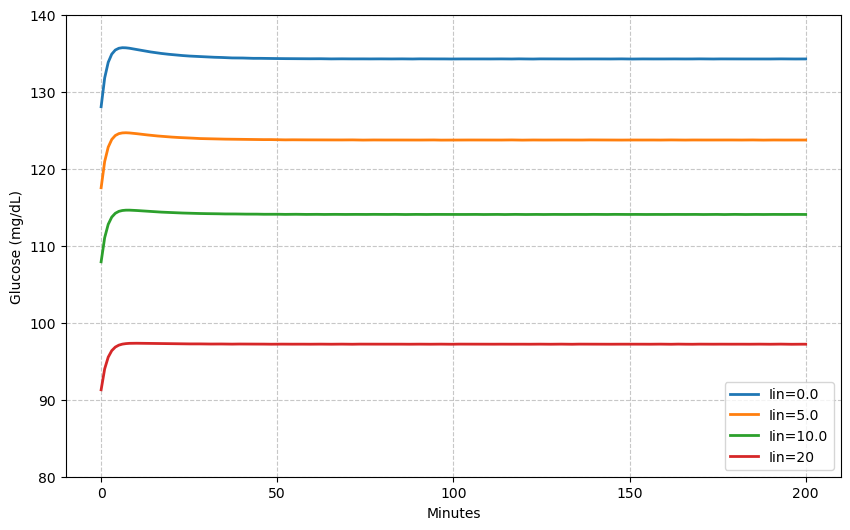

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These are the parameters for Female Subject 3
a = 0.0002       # (min^-1) - The insulin-independent utilization rate
b = 7.5919e-4    # (mL/μU/min) - The insulin-dependent utilization rate(insulin resistance)
c = 0.2298       # μU/ml/min/(mg/dl) - The insulin secretion rate
d = 1500         # μU/ml/min - The maximum insulin clearance rate
e = 2300         #   - The half-saturation value
G_in = 4.95       # (mg/dL/min) - The glucose intake rate

Iin_values = [0.0, 5.0, 10.0, 20]   #Insulin doses 

# Research paper results
research_results = {
    0: 128.052,
    5: 117.526, 
    10: 107.912,
    20: 91.2907
}

print("---- Validating our code with research----")
print("Our Code vs Research Paper:")
print("Iin | Our Result | Research | Difference")
print("----|------------|----------|-----------")

for I_in in Iin_values:
    # Run simulation to steady state
    sol = solve_ivp(glucose_insulin_model, [0, 1000], [150, 10], 
                   args=(I_in,), t_eval=np.linspace(0, 1000, 1000))
    
    our_result = np.mean(sol.y[0][-100:])  # Average of last 100 points
    research_value = research_results[I_in]
    difference = abs(our_result - research_value)
    
    print(f"{I_in:3} | {our_result:10.3f} | {research_value:8.3f} | {difference:10.3f}")
    

# Create the graph
plt.figure(figsize=(10, 6))

for I_in in Iin_values:
    sol = solve_ivp(glucose_insulin_model, [0, 200], [research_results[I_in], I_in], 
                   args=(I_in,), t_eval=np.linspace(0, 200, 200))
    plt.plot(sol.t, sol.y[0], label=f'Iin={I_in}', linewidth=2)

plt.xlabel('Minutes')
plt.ylabel('Glucose (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 201, 50))
plt.yticks(np.arange(80, 141, 10))
plt.ylim(80, 140)
plt.show()

# The CGM data

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("HUPA0001P.csv",sep=";" )

# Removing unrealiable data from fitbit
df = df.drop(columns=["heart_rate", "steps", "basal_rate"])

# Convert to datetime 
df['time'] = pd.to_datetime(df['time']).dt.strftime('%d %H:%M:%S')

df.head()

,time,glucose,calories,bolus_volume_delivered,carb_input
0,13 18:40:00,332.0,6.3595,0.0,0.0
1,13 18:45:00,326.0,7.7280,0.0,0.0
2,13 18:50:00,330.0,4.7495,0.0,0.0
3,13 18:55:00,324.0,6.3595,0.0,0.0
4,13 19:00:00,306.0,5.1520,0.0,0.0


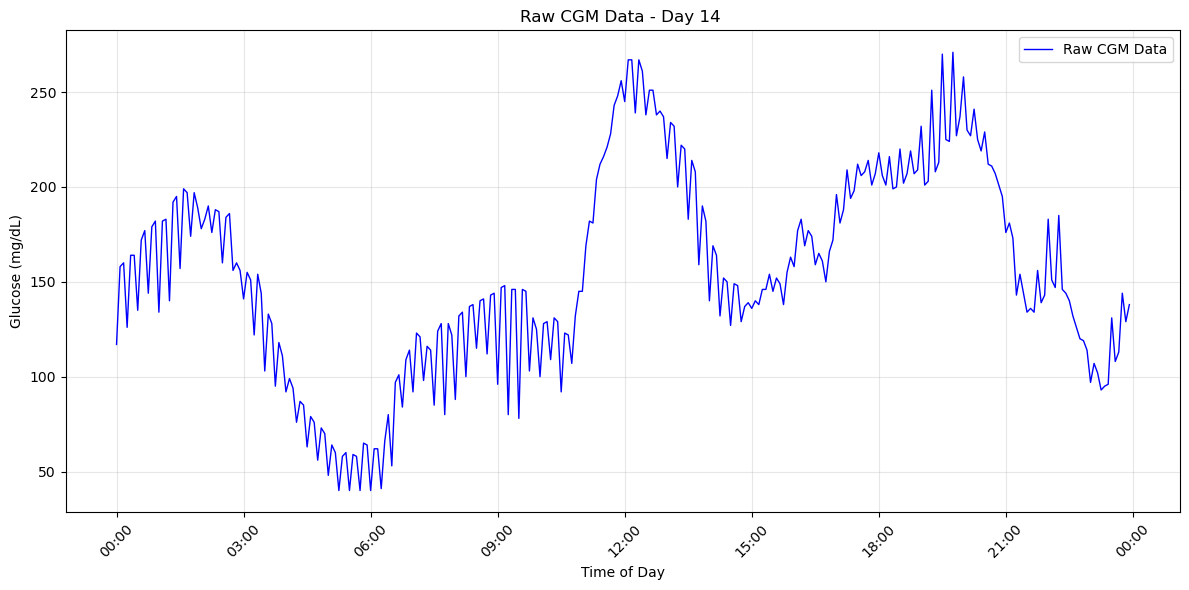

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HUPA0001P.csv", sep=";")
df['time'] = pd.to_datetime(df['time'])

day = 14
day_data = df[df['time'].dt.day == day].copy()

# Plot only raw data
plt.figure(figsize=(12, 6))
plt.plot(day_data['time'], day_data['glucose'], color='blue', linewidth=1, label='Raw CGM Data')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.ylabel('Glucose (mg/dL)')
plt.xlabel('Time of Day')
plt.title(f'Raw CGM Data - Day {day} ')
plt.grid(True, alpha=0.3)
# Save the plot in multiple formats for research purposes
#plt.savefig('Raw CGM data', dpi=600, bbox_inches='tight', facecolor='white', edgecolor='none')  # For PNG format
plt.legend()
plt.tight_layout()
plt.show()



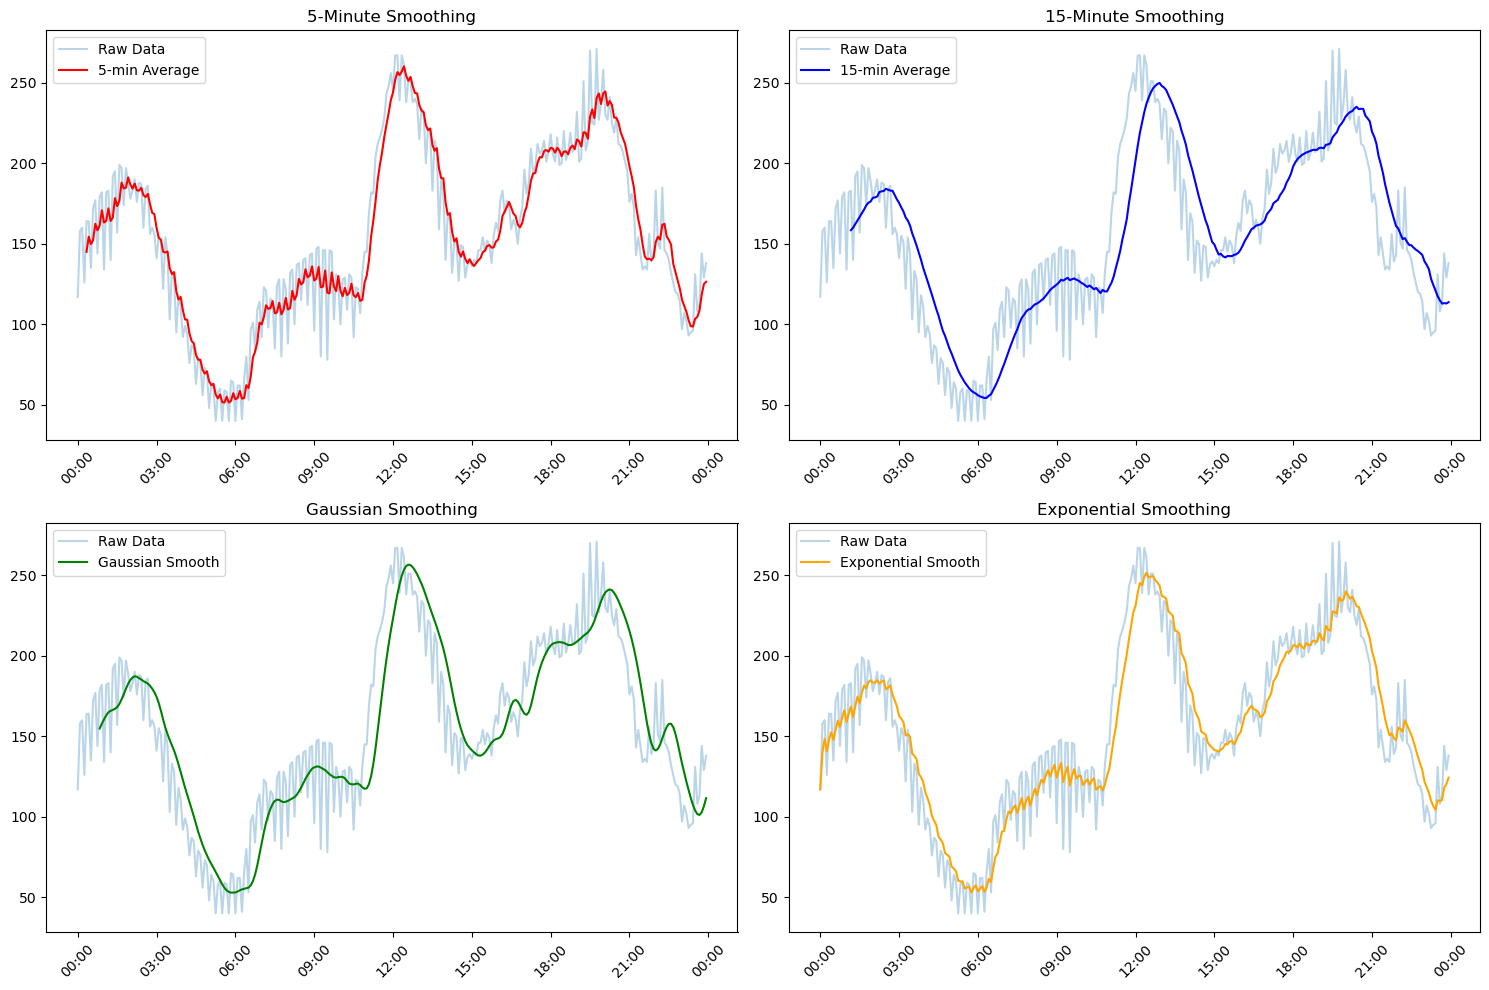

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HUPA0001P.csv",sep=";" )
df['time'] = pd.to_datetime(df['time'])

day = 14
day_data = df[df['time'].dt.day == day].copy()

# Try different smoothing methods
day_data['smooth_5min'] = day_data['glucose'].rolling(window=5).mean()
day_data['smooth_15min'] = day_data['glucose'].rolling(window=15).mean() 
day_data['smooth_gaussian'] = day_data['glucose'].rolling(window=11, win_type='gaussian').mean(std=2)
day_data['smooth_exp'] = day_data['glucose'].ewm(span=8).mean()

# Plot them with proper time formatting
plt.figure(figsize=(15, 10))

# Plot 1: 5-minute smoothing
plt.subplot(2, 2, 1)
plt.plot(day_data['time'], day_data['glucose'], alpha=0.3, label='Raw Data')
plt.plot(day_data['time'], day_data['smooth_5min'], color='red', label='5-min Average')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.legend()
plt.title("5-Minute Smoothing")

# Plot 2: 15-minute smoothing  
plt.subplot(2, 2, 2)
plt.plot(day_data['time'], day_data['glucose'], alpha=0.3, label='Raw Data')
plt.plot(day_data['time'], day_data['smooth_15min'], color='blue', label='15-min Average')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.legend()
plt.title("15-Minute Smoothing")

# Plot 3: Gaussian smoothing
plt.subplot(2, 2, 3)
plt.plot(day_data['time'], day_data['glucose'], alpha=0.3, label='Raw Data')
plt.plot(day_data['time'], day_data['smooth_gaussian'], color='green', label='Gaussian Smooth')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.legend()
plt.title("Gaussian Smoothing")

# Plot 4: Exponential smoothing
plt.subplot(2, 2, 4)
plt.plot(day_data['time'], day_data['glucose'], alpha=0.3, label='Raw Data')
plt.plot(day_data['time'], day_data['smooth_exp'], color='orange', label='Exponential Smooth')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.legend()
plt.title("Exponential Smoothing")

plt.tight_layout()
# Save the plot in multiple formats for research purposes
#plt.savefig('smoothing techniques', dpi=600, bbox_inches='tight', facecolor='white', edgecolor='none')  # For PNG format
plt.show()

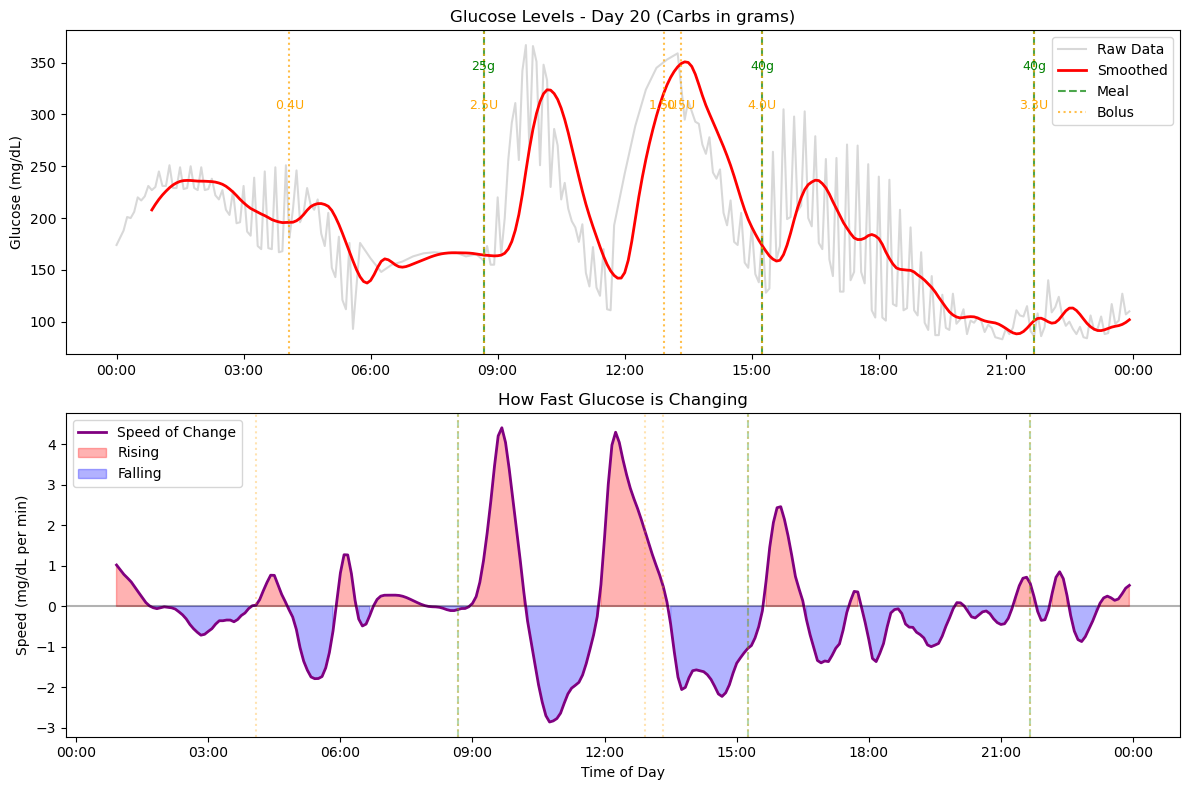

Fastest rise: 4.41 mg/dL per minute at 09:40
Fastest fall: -2.86 mg/dL per minute at 10:45

--- MEALS (converted to grams) ---
  08:40: 25g (2.5 servings)
  15:15: 40g (4.0 servings)
  21:40: 40g (4.0 servings)

--- BOLUS INSULIN ---
  04:05: 0.4 units
  08:40: 2.5 units
  12:55: 1.5 units
  13:20: 0.5 units
  15:15: 4.0 units
  21:40: 3.3 units


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("HUPA0001P.csv",sep=";" )
df['time'] = pd.to_datetime(df['time'])

# Pick a day to analyze
day = 15
day_data = df[df['time'].dt.day == day].copy()

# Convert carb servings back to grams (1 serving = 10g)
day_data['carbs_grams'] = day_data['carb_input'] * 10

# Use Gaussian smoothing (smoother than regular average)
day_data['glucose_smooth'] = day_data['glucose'].rolling(window=11, win_type='gaussian').mean(std=2)

# Calculate how fast glucose is changing (slope)
day_data['slope'] = np.gradient(day_data['glucose_smooth'].values) / 5

# Create the plot
plt.figure(figsize=(12, 8))

# Top plot: Glucose levels
plt.subplot(2, 1, 1)
plt.plot(day_data['time'], day_data['glucose'], alpha=0.3, label='Raw Data', color='gray')
plt.plot(day_data['time'], day_data['glucose_smooth'], color='red', label='Smoothed', linewidth=2)

# Add vertical lines for meals (carbs > 0)
meal_times = day_data[day_data['carb_input'] > 0]['time']
for time in meal_times:
    carbs_grams = day_data[day_data['time'] == time]['carbs_grams'].iloc[0]
    plt.axvline(x=time, color='green', linestyle='--', alpha=0.7, label='Meal' if time == meal_times.iloc[0] else "")
    plt.text(time, plt.ylim()[1]*0.9, f"{carbs_grams:.0f}g", color='green', ha='center', fontsize=9)

# Add vertical lines for bolus insulin
bolus_times = day_data[day_data['bolus_volume_delivered'] > 0]['time']
for time in bolus_times:
    bolus_amount = day_data[day_data['time'] == time]['bolus_volume_delivered'].iloc[0]
    plt.axvline(x=time, color='orange', linestyle=':', alpha=0.7, label='Bolus' if time == bolus_times.iloc[0] else "")
    plt.text(time, plt.ylim()[1]*0.8, f"{bolus_amount}U", color='orange', ha='center', fontsize=9)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.ylabel("Glucose (mg/dL)")
plt.legend()
plt.title(f"Glucose Levels - Day {day} (Carbs in grams)")

# Bottom plot: How fast glucose is changing
plt.subplot(2, 1, 2)
plt.plot(day_data['time'], day_data['slope'], color='purple', linewidth=2, label='Speed of Change')

# Add the same vertical lines to bottom plot
for time in meal_times:
    plt.axvline(x=time, color='green', linestyle='--', alpha=0.3)
for time in bolus_times:
    plt.axvline(x=time, color='orange', linestyle=':', alpha=0.3)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.xlabel("Time of Day")
plt.ylabel("Speed (mg/dL per min)")
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Color the areas to see rising vs falling easily
plt.fill_between(day_data['time'], day_data['slope'], 0, where=(day_data['slope'] > 0), color='red', alpha=0.3, label='Rising')
plt.fill_between(day_data['time'], day_data['slope'], 0, where=(day_data['slope'] < 0), color='blue', alpha=0.3, label='Falling')
plt.legend()
plt.title("How Fast Glucose is Changing")

plt.tight_layout()
plt.show()

# Find the fastest changes
fastest_up = day_data.loc[day_data['slope'].idxmax()]
fastest_down = day_data.loc[day_data['slope'].idxmin()]

print(f"Fastest rise: {fastest_up['slope']:.2f} mg/dL per minute at {fastest_up['time'].strftime('%H:%M')}")
print(f"Fastest fall: {fastest_down['slope']:.2f} mg/dL per minute at {fastest_down['time'].strftime('%H:%M')}")

# Print meal and bolus summary
print(f"\n--- MEALS (converted to grams) ---")
total_carbs = 0
for time in meal_times:
    carbs_grams = day_data[day_data['time'] == time]['carbs_grams'].iloc[0]
    carbs_servings = day_data[day_data['time'] == time]['carb_input'].iloc[0]
    print(f"  {time.strftime('%H:%M')}: {carbs_grams:.0f}g ({carbs_servings} servings)")
    total_carbs += carbs_grams

print(f"\n--- BOLUS INSULIN ---")
total_bolus = 0
for time in bolus_times:
    bolus_amount = day_data[day_data['time'] == time]['bolus_volume_delivered'].iloc[0]
    print(f"  {time.strftime('%H:%M')}: {bolus_amount} units")
    total_bolus += bolus_amount



# Insulin prediction vs traditional methods 

In [19]:
import pandas as pd
import numpy as np

# Store results
all_results = []

# Math formula parameters (from the research)
a = 0.0002
b = 7.5919e-4
c = 0.2298
d = 1500
e = 2300
G_in = 4.95

def smart_insulin_calculator(peak_glucose):
    """
    Your research formula simplified:
    Takes peak glucose, calculates insulin needed
    """
    G_star = peak_glucose
    
    # Research's exact formula
    part1 = d * (G_in - a * G_star)
    part2 = b * G_star + e
    part3 = G_in - a * G_star
    part4 = c * G_star
    
    I_in = (part1 / part2) + part3 - part4
    
    # Convert to normal insulin units
    insulin_units = abs(I_in) / 10
    return max(insulin_units, 0)

# Analyze each patient
for patient_id in range(1, 29):
    try:
        # Load patient file
        filename = f"HUPA{patient_id:04d}P.csv"
        data = pd.read_csv(filename, sep=";")
        data['time'] = pd.to_datetime(data['time'])
        
        # Check each day
        for day in data['time'].dt.day.unique():
            day_data = data[data['time'].dt.day == day].copy()
            
            # Clean glucose data
            day_data['glucose_smooth'] = day_data['glucose'].rolling(window=11, win_type='gaussian').mean(std=2)
            day_data['carbs_grams'] = day_data['carb_input'] * 10
            
            # Find meals
            meals = day_data[day_data['carb_input'] > 0]
            
            for _, meal in meals.iterrows():
                # Look at 2 hours after meal
                meal_time = meal['time']
                end_time = meal_time + pd.Timedelta(hours=2)
                after_meal_data = day_data[
                    (day_data['time'] >= meal_time) & 
                    (day_data['time'] <= end_time)
                ]
                
                if len(after_meal_data) > 0:
                    # Get glucose info
                    peak_glucose = after_meal_data['glucose_smooth'].max()
                    actual_insulin = meal['bolus_volume_delivered'] if meal['bolus_volume_delivered'] > 0 else 0
                    
                    # TWO METHODS:
                    # 1. Traditional: carbs ÷ 10
                    traditional = meal['carbs_grams'] / 10
                    
                    # 2. Smart math model: The model from the research is used
                    smart_model = smart_insulin_calculator(peak_glucose)
                    
                    # Save results
                    all_results.append({
                        'patient': f'HUPA{patient_id:04d}P',
                        'carbs': meal['carbs_grams'],
                        'traditional': traditional,
                        'smart_model': smart_model,
                        'actual': actual_insulin,
                        'peak_glucose': peak_glucose
                    })
                    
    except FileNotFoundError:
        continue

# Create table
results_df = pd.DataFrame(all_results)

# Show results
print("SMART MODEL vs TRADITIONAL METHOD")
print("="*65)
print(f"{'Patient':<10} {'Carbs':<6} {'Traditional':<12} {'Smart Model':<12} {'Actual':<8} {'Peak Sugar':<10}")
print("-"*65)

for _, row in results_df.iterrows():
    print(f"{row['patient']:<10} {row['carbs']:<6} {row['traditional']:<12.1f} {row['smart_model']:<12.1f} {row['actual']:<8.1f} {row['peak_glucose']:<10.1f}")

# Save
results_df.to_csv('all_patients_analysis.csv', index=False)
print(f"\nSaved {len(results_df)} meals")

SMART MODEL vs TRADITIONAL METHOD
Patient    Carbs  Traditional  Smart Model  Actual   Peak Sugar
-----------------------------------------------------------------
HUPA0001P  40.0   4.0          3.1          3.5      168.6     
HUPA0001P  30.0   3.0          4.7          3.0      238.2     
HUPA0001P  40.0   4.0          3.2          4.0      172.6     
HUPA0001P  10.0   1.0          4.7          0.8      241.2     
HUPA0001P  40.0   4.0          3.0          4.0      166.4     
HUPA0001P  30.0   3.0          3.9          2.5      205.5     
HUPA0001P  20.0   2.0          3.8          2.5      201.4     
HUPA0001P  10.0   1.0          2.9          0.5      162.0     
HUPA0001P  25.0   2.5          2.9          2.3      162.3     
HUPA0001P  25.0   2.5          4.2          2.7      217.3     
HUPA0001P  40.0   4.0          3.5          5.0      189.5     
HUPA0001P  5.0    0.5          4.6          0.6      233.8     
HUPA0001P  20.0   2.0          4.6          1.5      233.7     
HUPA

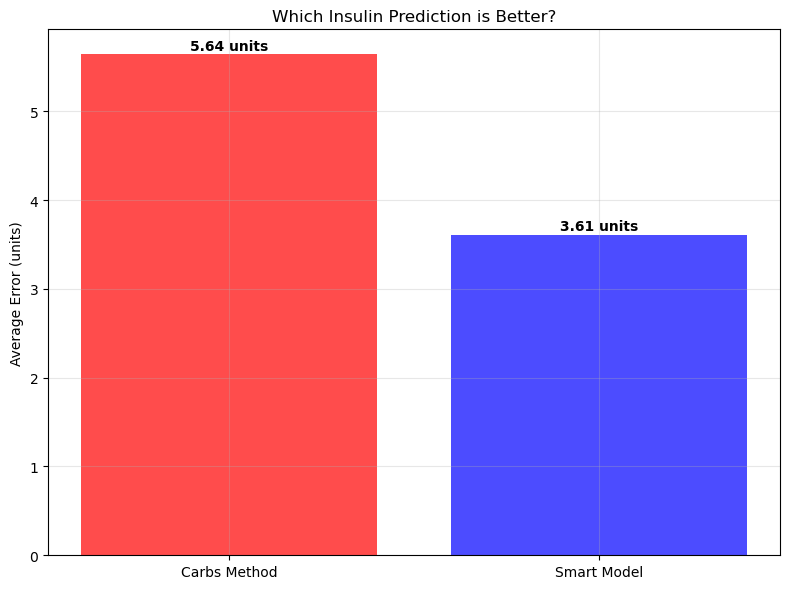


FINAL RESULTS: SMART MODEL vs CARBS METHOD
Carbs Method: 5.64 units off on average
Smart Model:  3.61 units off on average
Based on 2646 meals from real patients

SMART MODEL IS BETTER by 2.03 units


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

# Read our results file
data = pd.read_csv("all_patients_analysis.csv")

# For each meal, calculate how WRONG each prediction was
data['carbs_error'] = (data['traditional'] - data['actual']).abs()
data['model_error'] = (data['smart_model'] - data['actual']).abs()

# Find the AVERAGE amount each method was wrong
carbs_avg_error = data['carbs_error'].mean()
model_avg_error = data['model_error'].mean()

# Make a simple bar chart to compare
methods = ['Carbs Method', 'Smart Model']
average_errors = [carbs_avg_error, model_avg_error]
colors = ['red', 'blue']

plt.figure(figsize=(8, 6))
bars = plt.bar(methods, average_errors, color=colors, alpha=0.7)
plt.ylabel('Average Error (units)')
plt.title('Which Insulin Prediction is Better?')

# Show the actual numbers on the bars
for bar, error in zip(bars, average_errors):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{error:.2f} units', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('Insulin prediction', dpi=600, bbox_inches='tight', facecolor='white', edgecolor='none')  # For PNG format
plt.show()

# Print the results in plain English
print("\n" + "="*50)
print("FINAL RESULTS: SMART MODEL vs CARBS METHOD")
print("="*50)
print(f"Carbs Method: {carbs_avg_error:.2f} units off on average")
print(f"Smart Model:  {model_avg_error:.2f} units off on average")
print(f"Based on {len(data)} meals from real patients")

print("\n" + "="*50)
# Show which is better
if carbs_avg_error < model_avg_error:
    difference = model_avg_error - carbs_avg_error
    print(f" CARBS METHOD IS BETTER by {difference:.2f} units")
    print("The traditional method was more accurate")
else:
    difference = carbs_avg_error - model_avg_error
    print(f"SMART MODEL IS BETTER by {difference:.2f} units")
print("="*50)


